## 邻接表的实现

In [30]:
# Vertex表示图中的顶点

class Vertex:
    def __init__(self, key):
        self.key = key
        self.neighbors = {}
    
    def get_neighbors(self, other):
        return self.neighbors.get(other, None)
    
    def set_neighbor(self, other, weight=0):
        self.neighbors[other] = weight
        
    def __repr__(self):
        return f"Vertex({self.key})"
    
    def __str__(self):
        return f"{self.key} connected to: " + f"{[x.key for x in self.neighbors]}"
    
    def get_neighbors(self):
        return self.neighbors.keys()
    
    def get_key(self):
        return self.key

In [31]:
# 实现图的类

class Graph:
    def __init__(self):
        self.vertices = {}
        
    def set_vertex(self, key):
        self.vertices[key] = Vertex(key)
        
    def get_vertex(self, key):
        return self.vertices.get(key, None)
    
    def __contains__(self, key):
        return key in self.vertices
    
    def add_edge(self, from_vert, to_vert, weight=0):
        if from_vert not in self.vertices:
            self.set_vertex(from_vert)
        if to_vert not in self.vertices:
            self.set_vertex(to_vert)
        self.vertices[from_vert].set_neighbor(self.vertices[to_vert], weight)
        
    def get_vertices(self):
        return self.vertices.keys()
    
    def __iter__(self):
        """
        迭代方法，可以方便的遍历图中的所有顶点
        """
        return iter(self.vertices.values())

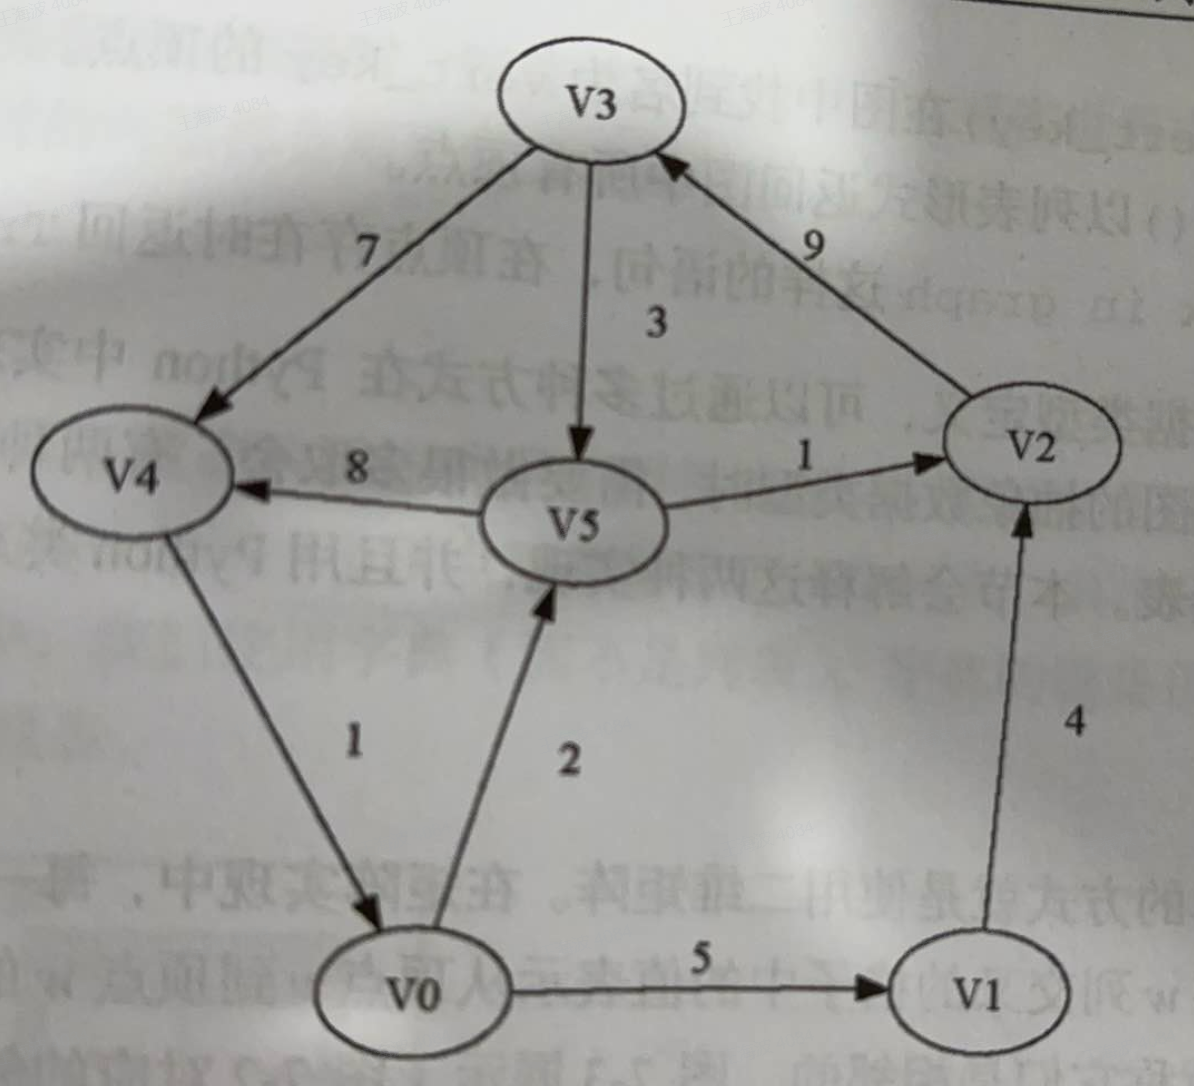

In [32]:
# 使用创建的两个类来实现上图。

g = Graph()

In [33]:
for i in range(6):
    g.set_vertex(i)

In [34]:
g.vertices

{0: Vertex(0),
 1: Vertex(1),
 2: Vertex(2),
 3: Vertex(3),
 4: Vertex(4),
 5: Vertex(5)}

In [35]:
g.add_edge(0, 1, 5)

In [36]:
g.add_edge(0, 5, 2)

In [37]:
g.add_edge(1, 2, 4)

In [38]:
g.add_edge(2, 3, 9)

In [39]:
g.add_edge(3, 4, 7)

In [40]:
g.add_edge(3, 5, 3)

In [41]:
g.add_edge(4, 0, 1)

In [42]:
g.add_edge(5, 4, 8)

In [43]:
g.add_edge(5, 2, 1)

In [44]:
for v in g:
    print(v)

0 connected to: [1, 5]
1 connected to: [2]
2 connected to: [3]
3 connected to: [4, 5]
4 connected to: [0]
5 connected to: [4, 2]


In [52]:
list(g.vertices.values())[0]

Vertex(0)

## 广度优先搜索

In [61]:
from pythonds3.graphs import Graph


def build_graph(filename):
    buckets = {}
    the_graph = Graph()
    with open(filename, 'r', encoding='utf8') as file_in:
        all_words = file_in.readlines()
        
    # 创建词桶
    for line in all_words:
        word = line.strip()
        for i, _ in enumerate(word):
            bucket = f"{word[:i]}_{word[i + 1 :]}"
            buckets.setdefault(bucket, set()).add(word)
            
    for similar_words in buckets.values():
        for word1 in similar_words:
            for word2 in similar_words - {word1}:
                the_graph.add_edge(word1, word2)
    
    return the_graph

In [62]:
the_graph = build_graph('words_small.txt')

In [67]:
a = {}
a.setdefault('cities', set()).add('wuhan')
a.setdefault('cities', set()).add('huaian')
a.setdefault('countries', set()).add('China')
a

{'cities': {'huaian', 'wuhan'}, 'countries': {'China'}}

In [68]:
a.values()

dict_values([{'wuhan', 'huaian'}, {'China'}])

In [70]:
# 广度优先搜索

from pythonds3.basic import Queue

def bfs(start):
    start.distance = 0
    start.previous = None
    vert_queue = Queue()
    vert_queue.enqueue(start)
    while vert_queue.size() > 0:
        current = vert_queue.dequeue()
        for neighbor in current.get_neighbors():
            if neighbor.color == 'white':
                neighbor.color = 'gray'
                neighbor.distance = current.distance + 1
                neighbor.previous = current
                vert_queue.enqueue(neighbor)
        current.color = 'black'

In [71]:
# 回溯广度优先搜索树

def traverse(starting_vertex):
    current = starting_vertex
    while current:
        print(current.key)
        current = current.previous

## 深度优先搜索

In [75]:
# 构建骑士周游图

from pythonds3.graphs import Graph

def knight_graph(board_size):
    kt_graph = Graph()
    for row in range(borad_size):
        for col in range(board_size):
            node_id = row * board_size + col
            new_positions = gen_legal_moves(row, col, board_size)
            for row2, col2 in new_positions:
                other_node_id = row2 * board_size + col2
                kt_graph.add_edge(node_id, other_node_id)
    return kt_graph
            
            
def gen_legal_moves(row, col, board_size):
    new_moves = []
    move_offsets = [
        (-1, -2),
        (-1, 2),
        (-2, -1),
        (-2, 1),
        (1, -2),
        (1, 2),
        (2, -1),
        (2, 1)
    ]
    for r_off, c_off in move_offsets:
        if 0 <= row + r_off < board_size and 0 <= col + c_off < board_size:
            new_moves.append((row + r_off, col + c_off))
    return new_moves

In [76]:
# 递归函数的knight_tour 真的看不懂

def knight_tour(n, path, u, limit):
    u.color = 'gray'
    path.append(u)
    if n < limit:
        neighbors = sorted(list(u.get_neighbors()))
        i = 0
        done = False
        while i < len(neighbors) and not done:
            if neighbors[i].color == 'white':
                done = knight_tour(n+1, path, neighbors[i], limit)
                i += 1
        if not done:  # 准备回溯
            path.pop()
            u.color = 'white'
    else:
        done = True
        
    return done

#### 通用深度优先搜索

In [77]:
from pythonds3.graphs import Graph

class DFSGraph(Graph):
    def __init__(self):
        super().__init__()
        self.time = 0
        
    def dfs(self):
        for vertex in self:
            vertex.color = 'white'
            vertex.previous = -1
        for vertex in self:
            if vertex.color == 'white':
                self.dfs_visit(vertex)
                
    def dfs_visit(self, start_vertex):
        start_vertex.color = 'gray'
        self.time = self.time + 1
        start_vertex.discovery_time = self.time
        for next_vertex in start_vertex.get_neighbors():
            if next_vertex.color == 'white':
                next_vertex.previous = start_vertex
                self.dfs_visit(next_vertex)
        start_vertex.color = 'black'
        self.time = self.time + 1
        start_vertex.closing_time = self.time